## Feature Selection for categorical data

##### Method: - 

1. Compute chi-squared stats between each non-negative feature and class (target variable).


2. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X,
relative to the target variable.


3. Recall that the chi-square test measures dependence between stochastic variables, 
   so using this function “weeds out” the features that are the most likely to be independent of class and 
   therefore irrelevant for classification.

reference : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2



In [2]:
pd.set_option('max_columns',100)

In [3]:
hotel=pd.read_csv('hotel_bookings.csv')
hotel.shape

(119390, 32)

In [4]:
hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#hotel, is_canceled, meal, 'country, market_segment,distribution_channel,reserved_room_type, assigned_room_type,is_repeated_guest
temp=hotel.iloc[:,[0,1,12,13,14,15,16,19,20]] 


In [7]:
temp.columns

Index(['hotel', 'is_canceled', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type'],
      dtype='object')

In [8]:
temp.head(5)

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type
0,Resort Hotel,0,BB,PRT,Direct,Direct,0,C,C
1,Resort Hotel,0,BB,PRT,Direct,Direct,0,C,C
2,Resort Hotel,0,BB,GBR,Direct,Direct,0,A,C
3,Resort Hotel,0,BB,GBR,Corporate,Corporate,0,A,A
4,Resort Hotel,0,BB,GBR,Online TA,TA/TO,0,A,A


In [9]:
temp.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  object
 1   is_canceled           119390 non-null  int64 
 2   meal                  119390 non-null  object
 3   country               118902 non-null  object
 4   market_segment        119390 non-null  object
 5   distribution_channel  119390 non-null  object
 6   is_repeated_guest     119390 non-null  int64 
 7   reserved_room_type    119390 non-null  object
 8   assigned_room_type    119390 non-null  object
dtypes: int64(2), object(7)
memory usage: 8.2+ MB


C:\Users\ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [10]:
temp.is_repeated_guest.value_counts() # no need for label encoding

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [11]:
temp.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  object
 1   is_canceled           119390 non-null  int64 
 2   meal                  119390 non-null  object
 3   country               118902 non-null  object
 4   market_segment        119390 non-null  object
 5   distribution_channel  119390 non-null  object
 6   is_repeated_guest     119390 non-null  int64 
 7   reserved_room_type    119390 non-null  object
 8   assigned_room_type    119390 non-null  object
dtypes: int64(2), object(7)
memory usage: 8.2+ MB


C:\Users\ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [13]:
label_encoder = LabelEncoder()
temp.loc[:,'hotel'] = label_encoder.fit_transform(temp['hotel'])
temp.loc[:,'meal'] = label_encoder.fit_transform(temp['meal'])
temp.loc[:,'market_segment'] = label_encoder.fit_transform(temp['market_segment'])
temp.loc[:,'distribution_channel'] = label_encoder.fit_transform(temp['distribution_channel'])
temp.loc[:,'is_repeated_guest'] = label_encoder.fit_transform(temp['is_repeated_guest'])
temp.loc[:,'reserved_room_type'] = label_encoder.fit_transform(temp['reserved_room_type'])
temp.loc[:,'assigned_room_type'] = label_encoder.fit_transform(temp['assigned_room_type'])

C:\Users\ankit\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [14]:
temp.loc[:,'country'] = label_encoder.fit_transform(temp['country']) # it will throw an error , because we can not encode if columns contains missing values

TypeError: argument must be a string or number

In [15]:
temp = temp.dropna()

In [16]:
temp.isnull().sum()

hotel                   0
is_canceled             0
meal                    0
country                 0
market_segment          0
distribution_channel    0
is_repeated_guest       0
reserved_room_type      0
assigned_room_type      0
dtype: int64

In [17]:
temp.loc[:,'country'] = label_encoder.fit_transform(temp['country'])

In [18]:
temp.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type
0,1,0,0,135,3,1,0,2,2
1,1,0,0,135,3,1,0,2,2
2,1,0,0,59,3,1,0,0,2
3,1,0,0,59,2,0,0,0,0
4,1,0,0,59,6,3,0,0,0


In [20]:
X = temp.drop('is_canceled',axis=1)
y = temp['is_canceled']



In [21]:
Stats,Pvalue = chi2(X,y)
# returns two values 

In [22]:

Stats = pd.Series(Stats,index = X.columns)
Stats.sort_values(ascending = False , inplace = True)
Stats

country                 186400.963072
assigned_room_type        9763.352414
hotel                     1423.813143
reserved_room_type        1337.977890
distribution_channel      1023.015214
is_repeated_guest          835.187192
market_segment             124.429709
meal                        85.186780
dtype: float64

In [23]:

P_values = pd.Series(Pvalue,index = X.columns)
P_values.sort_values(ascending = False , inplace = True)
P_values


meal                     2.714709e-20
market_segment           6.784022e-29
is_repeated_guest       1.207634e-183
distribution_channel    1.785025e-224
reserved_room_type      6.312252e-293
hotel                   1.405443e-311
country                  0.000000e+00
assigned_room_type       0.000000e+00
dtype: float64

<AxesSubplot:>

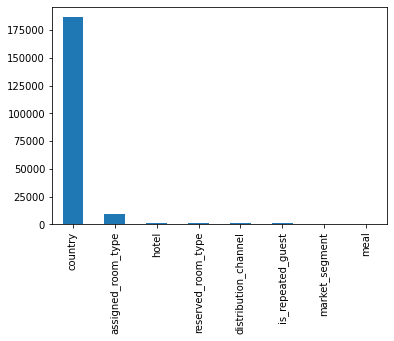

In [24]:
Stats.plot.bar()

In [25]:
#### Country is most important variable

In [27]:
X.country.value_counts()

135    48590
59     12129
56     10415
51      8568
43      7287
       ...  
40         1
105        1
44         1
109        1
148        1
Name: country, Length: 177, dtype: int64

In [28]:
X = X.drop('country',axis=1)



In [29]:
F,Pvalue = chi2(X,y)
# returns two values 

In [32]:

Stats = pd.Series(F,index = X.columns)
Stats.sort_values(ascending = False , inplace = True)
Stats


assigned_room_type      9763.352414
hotel                   1423.813143
reserved_room_type      1337.977890
distribution_channel    1023.015214
is_repeated_guest        835.187192
market_segment           124.429709
meal                      85.186780
dtype: float64

In [31]:

P_values = pd.Series(Pvalue,index = X.columns)
P_values.sort_values(ascending = False , inplace = True)
P_values


meal                     2.714709e-20
market_segment           6.784022e-29
is_repeated_guest       1.207634e-183
distribution_channel    1.785025e-224
reserved_room_type      6.312252e-293
hotel                   1.405443e-311
assigned_room_type       0.000000e+00
dtype: float64

<AxesSubplot:>

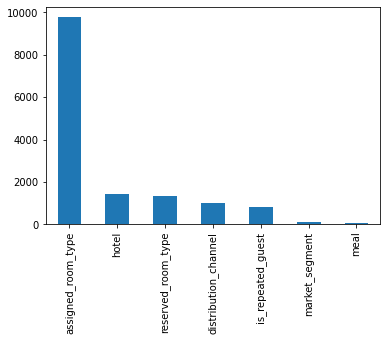

In [33]:
Stats.plot.bar()

In [34]:
X1 = X[['assigned_room_type','hotel']]